Assignment 0 | Formation based UAV Path-Planning

# Submission Guidelines Github
Make a copy of this notebook then solve. The name of the solution file should be strictly :- **ProjectName_Rollno_FullName**

Firstly, download the solution notebook in ipynb format, then upload in your forked repository in **Assignment_0 folder** then open pull request as specified on the community group. Note that if your notebook size is greater than 25MB then please reduce it as github only allows file size less than 25MB per upload. You can clear output cell of question 2 solution (only if output plot is taking much space) to reduce size.

Project Repo:-
https://github.com/electricalengineersiitk/Winter-projects-25-26/tree/main/Formation-Based%20UAV%20Path%20Planning

**DEADLINE : 12 DECEMBER EOD**

Please refrain from using any AI tools. All the work should be your own

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Question 1:

Consider the flower petal $r(\theta) = 1+3\sin(6 \theta)$ for $0 \leq \theta \leq 2 \pi$

1. Make a plot of the flower (find x and y points)

2. Implement the formulas that you studied in MTH 112 to calculate area and arclength (Do not use any in built functions)

## Your Solution 1

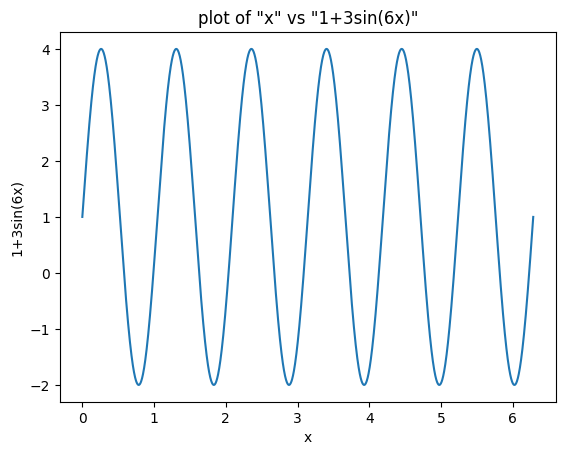

In [ ]:
# plot
x = np.linspace(0, 2 * np.pi, 2000)
y = 1 + 3 * np.sin(6*x)
y_diff = np.diff(y)
plt.title('plot of "x" vs "1+3sin(6x)"')
plt.xlabel("x")
plt.ylabel("1+3sin(6x)")
plt.plot(x, y)
plt.show()

In [ ]:
# area and arclength
# note : as integration of sin function over a complete period here from 0 to 2*pi,  is 0.
# and integration over 0 to 2*pi of 1 will be 2*pi
# thus area under the given curve will be 2*pi
area = 2*np.pi
print(area)
arc_length = np.sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2))
print(arc_length)

6.283185307179586
72.52952889813264


## Question 2
You are given coordinates of 98 drones representing a closed shape. The drones must follow that path for a show. By using those points plot the epicycle approximation of that shape so that drones can be programmed for that path. (You can use the reference code to draw epicycles in the notebook that we sent you as a resource)

$Position = \{ \ (0,\, 5),(\pm 0.356,\, 4.987),(\pm 0.66,\, 4.96),(\pm 0.98,\, 4.90),(\pm 1.27,\, 4.84),(\pm 2.3,\, 6),(\pm 2.6,\, 7.1),(\pm 3.33,\, 8.49),(\pm 3.91,\, 8.79),(\pm 4.48,\, 8.95),(\pm 5.22,\, 8.99),(\pm 5.90,\, 8.86),(\pm 6.68,\, 8.48),(\pm 7.25,\, 7.98),(\pm 7.64,\, 7.41),(\pm 7.90,\, 6.76),(\pm 8,\, 6),(\pm 7.86,\, 5.11),(\pm 7.20,\, 3.96),(\pm 5.55,\, 3.05),(\pm 4.5,\, 2.18),(\pm 4.65,\, 1.82),(\pm 4.81,\,\pm 1.37),(\pm 4.90,\,\pm 0.98),(\pm 4.96,\, \pm 0.66),(\pm 4.99,\,\pm 0.36),(\pm 5,\, 0),(\pm 5.12,\, -1.66),(\pm 5.20,\, -2.04),(\pm 5.06,\, -2.63),(\pm 4.79,\, -3.11),(\pm 4.55,\, -3.41),(\pm 4.28,\, -3.66),(\pm 3.99,\, -3.87),(\pm 3.68,\, -4.05),(\pm 3.29,\, -4.18),(\pm 3,\, -4.21),(\pm 2.87,\, -4.30),(\pm 2.6,\, -4.48),(\pm 2.33,\, 4.67),(\pm 2.14,\, -4.81),(\pm 1.71,\, -5.13),(\pm 1.22,\, -5.46),(\pm 0.9,\, -5.62),(\pm 0.4,\, -5.80),(0,\, -5.85) \}$

Assume origin as the center of first circle.

### Given points array

In [ ]:
points = np.array([(0, 5),
 (0.356, 4.987),
 (0.66, 4.96),
 (0.98, 4.9),
 (1.27, 4.84),
 (2.3, 6),
 (2.6, 7.1),
 (3.33, 8.49),
 (3.91, 8.79),
 (4.48, 8.95),
 (5.22, 8.99),
 (5.9, 8.86),
 (6.68, 8.48),
 (7.25, 7.98),
 (7.64, 7.41),
 (7.9, 6.76),
 (8, 6),
 (7.86, 5.11),
 (7.2, 3.96),
 (5.55, 3.05),
 (4.5, 2.18),
 (4.65, 1.82),
 (4.81, 1.37),
 (4.9, 0.98),
 (4.96, 0.66),
 (4.99, 0.36),
 (5, 0),
 (4.99, -0.36),
 (4.96, -0.66),
 (4.9, -0.98),
 (4.81, -1.37),
 (5.12, -1.66),
 (5.2, -2.04),
 (5.06, -2.63),
 (4.79, -3.11),
 (4.55, -3.41),
 (4.28, -3.66),
 (3.99, -3.87),
 (3.68, -4.05),
 (3.29, -4.18),
 (3, -4.21),
 (2.87, -4.3),
 (2.6, -4.48),
 (2.33, -4.67),
 (2.14, -4.81),
 (1.71, -5.13),
 (1.22, -5.46),
 (0.9, -5.62),
 (0.4, -5.8),
 (0, -5.85),
 (-0.4, -5.8),
 (-0.9, -5.62),
 (-1.22, -5.46),
 (-1.71, -5.13),
 (-2.14, -4.81),
 (-2.33, -4.67),
 (-2.6, -4.48),
 (-2.87, -4.3),
 (-3, -4.21),
 (-3.29, -4.18),
 (-3.68, -4.05),
 (-3.99, -3.87),
 (-4.28, -3.66),
 (-4.55, -3.41),
 (-4.79, -3.11),
 (-5.06, -2.63),
 (-5.2, -2.04),
 (-5.12, -1.66),
 (-4.81, -1.37),
 (-4.9, -0.98),
 (-4.96, -0.66),
 (-4.99, -0.36),
 (-5, 0),
 (-4.99, 0.36),
 (-4.96, 0.66),
 (-4.9, 0.98),
 (-4.81, 1.37),
 (-4.65, 1.82),
 (-4.5, 2.18),
 (-5.55, 3.05),
 (-7.2, 3.96),
 (-7.86, 5.11),
 (-8, 6),
 (-7.9, 6.76),
 (-7.64, 7.41),
 (-7.25, 7.98),
 (-6.68, 8.48),
 (-5.9, 8.86),
 (-5.22, 8.99),
 (-4.48, 8.95),
 (-3.91, 8.79),
 (-3.33, 8.49),
 (-2.6, 7.3),
 (-2.3, 6),
 (-1.27, 4.84),
 (-0.98, 4.9),
 (-0.66, 4.96),
 (-0.356, 4.987)])

len(points)

98

### 2.1) Plot the points using matplotlib. What shape did you noticed ?

### 2.2) Plot the epicyclic approximation of this shape. Assume all the points of this shape are (xn,yn) means there are n circles having radii $R_i$, angular frequency $w_i$ and phase $\phi_i$ (from i = 1 to n) representing the given shape

$$
x_n = \sum_{i=1}^{n} R_i \cos(\omega_i t + \phi_i), \qquad
y_n = \sum_{i=1}^{n} R_i \sin(\omega_i t + \phi_i)
$$

We can generalize it as a complex number   

$$z_n = \sum_{i=1}^n R_i e^{ j (\omega_i t + \phi_i) } = \sum_{i=1}^n C_i e^{ j (\omega_i t)}$$

where  $j = \sqrt{-1}$   and   $C_ie^{j \omega_i t}$ represents a circle of radii $R_i$, angular frequency $w_i$ and phase $\phi_i$

## Hints Q2
It will be difficult to derive the formula to calculate $C_i$ for each term. So, here's the in built function for that. (It requires the knowledge of Fourier transforms which some of you will study in 2nd year and its currently out of scope)

In [ ]:
# # First convert each point into a complex number then use the below code to calculate R_i , w_i and phi_i via C_i
# # N = 98 drones
# C = np.fft.fft(z)/N #where z is the array of complex numbers of points
# w = 2*np.pi*(np.fft.fftfreq(N, d=1/N))
# #Ri is magnitude of Ci
# #phi_i is angle of Ci

## Your Solution 2

 given 98x2 array: 
[[ 0.     5.   ]
 [ 0.356  4.987]
 [ 0.66   4.96 ]
 [ 0.98   4.9  ]
 [ 1.27   4.84 ]
 [ 2.3    6.   ]
 [ 2.6    7.1  ]
 [ 3.33   8.49 ]
 [ 3.91   8.79 ]
 [ 4.48   8.95 ]
 [ 5.22   8.99 ]
 [ 5.9    8.86 ]
 [ 6.68   8.48 ]
 [ 7.25   7.98 ]
 [ 7.64   7.41 ]
 [ 7.9    6.76 ]
 [ 8.     6.   ]
 [ 7.86   5.11 ]
 [ 7.2    3.96 ]
 [ 5.55   3.05 ]
 [ 4.5    2.18 ]
 [ 4.65   1.82 ]
 [ 4.81   1.37 ]
 [ 4.9    0.98 ]
 [ 4.96   0.66 ]
 [ 4.99   0.36 ]
 [ 5.     0.   ]
 [ 4.99  -0.36 ]
 [ 4.96  -0.66 ]
 [ 4.9   -0.98 ]
 [ 4.81  -1.37 ]
 [ 5.12  -1.66 ]
 [ 5.2   -2.04 ]
 [ 5.06  -2.63 ]
 [ 4.79  -3.11 ]
 [ 4.55  -3.41 ]
 [ 4.28  -3.66 ]
 [ 3.99  -3.87 ]
 [ 3.68  -4.05 ]
 [ 3.29  -4.18 ]
 [ 3.    -4.21 ]
 [ 2.87  -4.3  ]
 [ 2.6   -4.48 ]
 [ 2.33  -4.67 ]
 [ 2.14  -4.81 ]
 [ 1.71  -5.13 ]
 [ 1.22  -5.46 ]
 [ 0.9   -5.62 ]
 [ 0.4   -5.8  ]
 [ 0.    -5.85 ]
 [-0.4   -5.8  ]
 [-0.9   -5.62 ]
 [-1.22  -5.46 ]
 [-1.71  -5.13 ]
 [-2.14  -4.81 ]
 [-2.33  -4.67 ]
 [-2.6   -4.48 ]
 [-2.87  -4

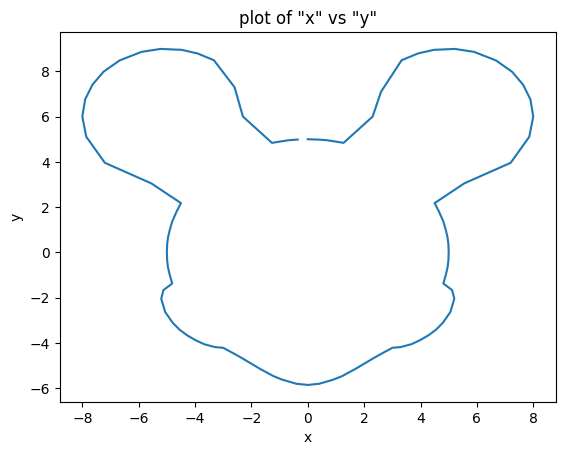

In [ ]:
#1
print(" given 98x2 array: ")
print(points)
print("point of column1")
print(points[:, 0])
print("points of column2")
print(points[:, 1])
x = points[:, 0]
y = points[:, 1]
plt.title('plot of "x" vs "y"')
plt.xlabel("x")
plt.ylabel("y")
print("The shape is looking like face of a cat")
plt.plot(x, y)
plt.show()

In [ ]:
#2
# First convert each point into a complex number then use the below code to calculate R_i , w_i and phi_i via C_i
z = np.array([complex(x[i], y[i]) for i in range(len(x))])
N = 98
C = np.fft.fft(z)/N # where z is the array of complex numbers of points
C_i = np.array([C[i] for i in range(len(C))])
w = 2*np.pi*(np.fft.fftfreq(N, d=1/N))
# W_i is the
W_i = np.array([w[i] for i in range(len(w))])
# Ri is magnitude of Ci
R_i = np.array([np.abs(C_i[i]) for i in range(len(C_i))])

#phi_i is angle of Ci
phi_i = np.array([np.angle(C_i[i]) for i in range(len(C_i))])
print("R_i:")
print(R_i)
print("W_i:")
print(W_i)
print("phi_i:")
print(phi_i)

R_i:
[1.14697959e+00 2.31142039e-01 5.97039306e-01 9.04990759e-01
 4.98523198e-01 3.14158932e-02 5.16741526e-02 2.62339614e-02
 1.17728428e-01 4.30009556e-02 9.04654507e-02 1.86486453e-01
 1.01285697e-01 2.54348012e-02 5.08848906e-03 5.74809305e-02
 5.62506432e-02 1.77137878e-02 3.14604393e-02 5.84225159e-02
 2.01965863e-02 4.90831558e-03 1.86874785e-02 4.68602581e-02
 2.91036345e-02 1.93731014e-02 4.89069925e-03 1.36066039e-02
 5.86390796e-03 1.80149876e-02 5.53198791e-03 2.56123048e-02
 2.19753218e-03 7.00541105e-03 5.99655308e-03 1.05441414e-02
 1.62030587e-02 2.47585726e-02 2.73816719e-03 3.04486227e-03
 5.72456178e-03 6.35321153e-03 9.06186389e-04 8.09299034e-03
 1.45842479e-02 1.62738230e-02 5.75324064e-03 5.60943075e-03
 1.67497504e-02 1.67755102e-02 7.40831035e-03 4.02652951e-03
 5.04120095e-03 8.12226673e-03 1.15263909e-02 1.04366172e-02
 2.17261275e-02 1.42419302e-02 1.24980420e-02 7.17485007e-03
 6.37029952e-03 1.06296259e-02 7.09387146e-03 1.02490162e-02
 5.43389633e-03 8.5

## Question 3
The energy required to get from point $\vec{r}_1$ to point $\vec{r}_2$ for a drone is given by

$$ E = \alpha \int_{C} \left| \frac{d\vec{r}}{dt} \right| dt - \int_C \vec{F} \cdot \frac{d\vec{r}}{dt}dt $$



3.1) Suppose that $\alpha=5$ and our start and ends points are $\vec{r}_1 = (0,0)$ and $\vec{r}_2 = (0, 10)$. On this particular day, the wind produces a force field $\vec{F} = (0, -2/(x+1)^2)$. Approximate the optimal value of $A$ (A>0) in $\vec{r}(t) = A\sin(\pi t/10)\hat{x} + t\hat{y}$ that minimizes the **work** using only numpy arrays .

3.2) Plot Energy as a function of A . (E(A) v/s A ) ? (Comment about its shape)

## Your Solution 3

In [ ]:
import numpy as np
def calculate_energy(A):
    t = np.linspace(0, 10.0, 1000)
    x = A * np.sin(np.pi*t/10)
    y = t
    dt = t[1] - t[0]
    alpha = 5
    vx = A*(np.pi/10)*np.cos((np.pi*t)/10)
    vy = np.ones_like(t)
    v_abs = np.sqrt(vx**2 + vy**2)
    F_x = 0
    F_y = -2 / (x+1)**2
    F_dot_drdt = F_x*vx + F_y*vy
    E = alpha*np.sum(np.abs(v_abs))*dt - np.sum(F_dot_drdt)*dt
    return E


A_values = np.linspace(0,10, 1000)
E_values = []


for i in A_values:
    E_values.append(calculate_energy(i))


E_values = np.array(E_values)
min = np.argmin(E_values)
optimal_A = A_values[min]
min_energy = E_values[min]
print(f"Optimal A: {optimal_A}")
print(f"Minimum Energy: {min_energy}")


Optimal A: 1.4214214214214214
Minimum Energy: 59.241764641627114


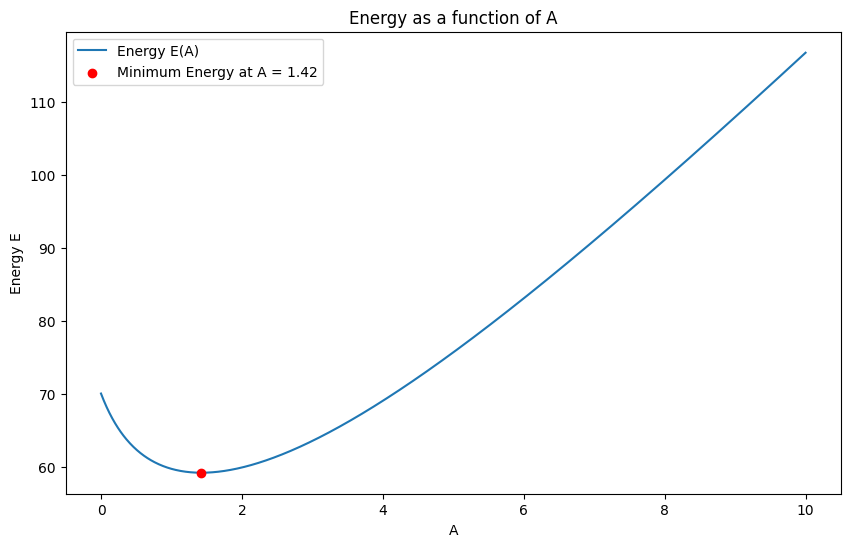

The plot of Energy E(A) versus A is a convex curve. It starts high, decreases to a minimum point, and then increases again. This indicates that there is a unique optimal A value that minimizes the energy required.


In [ ]:
#2
plt.figure(figsize=(10,6))
plt.plot(A_values, E_values, label='Energy E(A)')
plt.scatter(optimal_A, min_energy, color='red', zorder=5, label=f'Minimum Energy at A = {optimal_A:.2f}')
plt.title('Energy as a function of A')
plt.xlabel('A')
plt.ylabel('Energy E')
plt.legend()
plt.show()

# Comment about its shape
print("The plot of Energy E(A) versus A is a convex curve. It starts high, decreases to a minimum point, and then increases again. This indicates that there is a unique optimal A value that minimizes the energy required.")


## Question 4

You decide to install a series of camera drones along a straight path to spy on a suspicious person located at marker 31

You buy four drones and they are evenly spaced starting from mile marker 16 and ending on mile marker 25.

You buy another four drones starting on mile marker 29 and ending on mile marker 34. (also evenly spaced)

A drone can face only one direction at a time.
In order, from marker 16 to 34, each drone's orientation : N,S,E,W,S,E,W,N. (where N,S,E,W are cardinal directions)

Determine how far each drone facing E is from the person? (Solve using Numpy only)

## Your Solution 4

In [ ]:
# code
pos = 31
d1 = np.linspace(16, 25, 4)
d2 = np.linspace(29, 34, 4)
d3 = np.concatenate([d1, d2])
drone_direction = np.array(["N", "S", "E", "W", "S", "E", "W", "N"])
east_facing_indices = np.where(drone_direction == "E")[0]
east_facing_positions = d3[east_facing_indices]
distances_from_person = np.abs(east_facing_positions - pos)
# Display results
print(f"\nAll drone positions: {d3}")
print(f"each drone's directions:        {drone_direction}")
print(f"\nPerson's location: Mile marker {pos}")
print("-" * 50)
print(f"\nEast-facing drone indices: {east_facing_indices}")
print(f"East-facing drone positions: {east_facing_positions}")
print(f"\nDistances from person (marker {pos}):")
for i, distance in zip(east_facing_indices, distances_from_person):
    print(f"  Drone at index {i} (position {d3[i]:.2f}): {distance} miles")



All drone positions: [16.         19.         22.         25.         29.         30.66666667
 32.33333333 34.        ]
each drone's directions:        ['N' 'S' 'E' 'W' 'S' 'E' 'W' 'N']

Person's location: Mile marker 31
--------------------------------------------------

East-facing drone indices: [2 5]
East-facing drone positions: [22.         30.66666667]

Distances from person (marker 31):
  Drone at index 2 (position 22.00): 9.0 miles
  Drone at index 5 (position 30.67): 0.33333333333333215 miles
